In [110]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import r2_score, root_mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [155]:
def getData(url):
    driver = webdriver.Chrome()

    # Navigate to the URL
    driver.get(url)

    # Set the maximum waiting time in seconds
    wait = WebDriverWait(driver, 10)

    iframe = wait.until(EC.presence_of_element_located((By.ID, "onetrust-banner-sdk"))) # visibility_of_element_located: need to be visible, while 

    ok_button = wait.until(EC.element_to_be_clickable((By.ID, 'onetrust-accept-btn-handler'))) #(By.CSS_SELECTOR, 'button[title="J’accepte"]')
    ok_button.click()

    driver.switch_to.default_content()
    table = driver.find_element(By.CLASS_NAME, "Crom_table__p1iZz")  # Adjust XPath to match your table's location
        
    cols = table.find_elements(By.XPATH, '*')[0].find_elements(By.XPATH, '*')
    rows = table.find_elements(By.XPATH, '*')[1].find_elements(By.XPATH, '*')
    colList = []
    for c in cols:
        print(c.text.split())
        colList = c.text.split()

    data = pd.DataFrame(columns=colList)    

    for c in rows:
        lines = c.text.splitlines()
        row0 = lines[0]
        row1 = lines[1].split()
        row1.insert(0,row0)        
        data.loc[len(data.index)] = row1

    driver.close()

    return data

In [144]:
url = 'https://www.nba.com/stats/teams/traditional?dir=A&sort=TEAM_NAME&Season=2023-24'

In [153]:
df = getData(url=url) 

['TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-']


In [154]:
df

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,Atlanta Hawks,82,36,46,.439,48.4,118.3,43.0,92.5,46.5,...,32.2,44.7,26.6,13.5,7.5,4.5,5.6,18.6,19.4,-2.2
1,Boston Celtics,82,64,18,.780,48.4,120.6,43.9,90.2,48.7,...,35.6,46.3,26.9,11.9,6.8,6.6,3.7,16.2,17.3,11.3
2,Brooklyn Nets,82,32,50,.390,48.3,110.4,40.7,89.1,45.6,...,32.6,44.1,25.6,13.1,6.8,5.2,5.0,18.5,18.2,-2.9
3,Charlotte Hornets,82,21,61,.256,48.1,106.6,40.0,87.0,46.0,...,31.0,40.3,24.8,13.8,6.9,4.5,4.8,18.0,17.5,-10.2
4,Chicago Bulls,82,39,43,.476,48.7,112.3,42.0,89.5,47.0,...,32.6,43.8,25.0,12.2,7.8,4.8,4.9,18.8,18.8,-1.4
5,Cleveland Cavaliers,82,48,34,.585,48.3,112.6,41.8,87.2,47.9,...,33.4,43.3,28.0,13.6,7.4,4.6,5.0,17.5,18.7,2.4
6,Dallas Mavericks,82,50,32,.610,48.1,117.9,43.1,89.7,48.1,...,33.2,42.9,25.7,12.5,6.9,5.0,4.0,18.3,20.3,2.2
7,Denver Nuggets,82,57,25,.695,48.1,114.9,44.0,88.8,49.6,...,33.7,44.4,29.5,12.6,7.1,5.6,4.8,18.2,17.9,5.3
8,Detroit Pistons,82,14,68,.171,48.2,109.9,40.9,88.2,46.3,...,32.8,43.3,25.5,15.2,6.5,4.7,6.0,20.6,17.8,-9.1
9,Golden State Warriors,82,46,36,.561,48.4,117.8,43.7,91.6,47.7,...,34.6,46.7,29.3,14.3,7.0,4.6,5.0,19.5,17.9,2.6


In [117]:
df.dtypes

TEAM    float64
GP      float64
W       float64
L       float64
WIN%    float64
MIN     float64
PTS     float64
FGM     float64
FGA     float64
FG%     float64
3PM     float64
3PA     float64
3P%     float64
FTM     float64
FTA     float64
FT%     float64
OREB    float64
DREB    float64
REB     float64
AST     float64
TOV     float64
STL     float64
BLK     float64
BLKA    float64
PF      float64
PFD     float64
+/-     float64
dtype: object

In [118]:
df['TEAM'] = df['TEAM'].astype(str)

In [119]:
df.dtypes

TEAM     object
GP      float64
W       float64
L       float64
WIN%    float64
MIN     float64
PTS     float64
FGM     float64
FGA     float64
FG%     float64
3PM     float64
3PA     float64
3P%     float64
FTM     float64
FTA     float64
FT%     float64
OREB    float64
DREB    float64
REB     float64
AST     float64
TOV     float64
STL     float64
BLK     float64
BLKA    float64
PF      float64
PFD     float64
+/-     float64
dtype: object

In [121]:
df.columns

Index(['TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST',
       'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-'],
      dtype='object')

In [122]:
df = df.astype({'TEAM':str, 'GP':float, 'W':float, 'L':float, 'WIN%':float, 'MIN':float, 'PTS':float, 'FGM':float, 'FGA':float, 'FG%':float,
       '3PM':float, '3PA':float, '3P%':float, 'FTM':float, 'FTA':float, 'FT%':float, 'OREB':float, 'DREB':float, 'REB':float, 'AST':float,
       'TOV':float, 'STL':float, 'BLK':float, 'BLKA':float, 'PF':float, 'PFD':float, '+/-':float})

In [123]:
df = df.drop(['WIN%','FG%','3P%','FT%', '+/-'], axis=1)

In [124]:
df.head(2)

,TEAM,GP,W,L,MIN,PTS,FGM,FGA,3PM,3PA,...,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD
0,Atlanta Hawks,82.0,36.0,46.0,48.4,118.3,43.0,92.5,13.7,37.7,...,12.5,32.2,44.7,26.6,13.5,7.5,4.5,5.6,18.6,19.4
1,Boston Celtics,82.0,64.0,18.0,48.4,120.6,43.9,90.2,16.5,42.5,...,10.7,35.6,46.3,26.9,11.9,6.8,6.6,3.7,16.2,17.3


In [125]:
X = df.loc[:, 'MIN': 'PFD']
y = df['W']

In [126]:
model = LinearRegression()
model.fit(X,y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [127]:
y_pred = model.predict(X)

In [128]:
rmse = root_mean_squared_error(y,y_pred)
r2 = r2_score(y, y_pred)
print(rmse, r2)

2.5663975418445975 0.962118119194099


In [132]:
df2 = pd.concat([y, pd.Series(y_pred), pd.Series(y-y_pred)], axis=1)
df2.columns = ['observed', 'predicted', 'residual']
df2

,observed,predicted,residual
0,36.0,38.448253,-2.448253
1,64.0,64.542422,-0.542422
2,32.0,35.167209,-3.167209
3,21.0,22.210864,-1.210864
4,39.0,43.525234,-4.525234
5,48.0,46.706580,1.293420
6,50.0,48.496846,1.503154
7,57.0,51.483815,5.516185
8,14.0,15.051589,-1.051589
9,46.0,46.002550,-0.002550


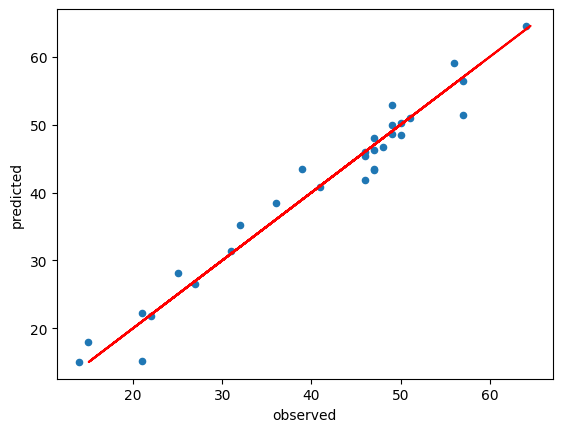

In [133]:
df2.plot.scatter(x='observed', y='predicted')
plt.plot(df2['predicted'], df2['predicted'], color='red')